Model Comparison Results:
                       Model  Accuracy  Precision    Recall  F1-score
0        Logistic Regression  0.788618   0.825253  0.788618  0.761491
1              Random Forest  0.772358   0.790645  0.772358  0.746990
2              Decision Tree  0.691057   0.682441  0.691057  0.685055
3  Support Vector Classifier  0.796748   0.845141  0.796748  0.768831
4        K-Nearest Neighbors  0.764228   0.783381  0.764228  0.736006

Test Results with Predictions:
     Gender   Married  Education  Self_Employed  ApplicantIncome  \
0  0.483393  0.757442   0.534173      -0.397516         0.604085   
1  0.483393  0.757442   0.534173      -0.397516        -0.201226   
2  0.483393  0.757442   0.534173      -0.397516        -0.225353   
3 -2.068712 -1.320234   0.534173      -0.397516        -0.439124   
4  0.483393 -1.320234   0.534173      -0.397516        -0.469831   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.528127    0.926826          0

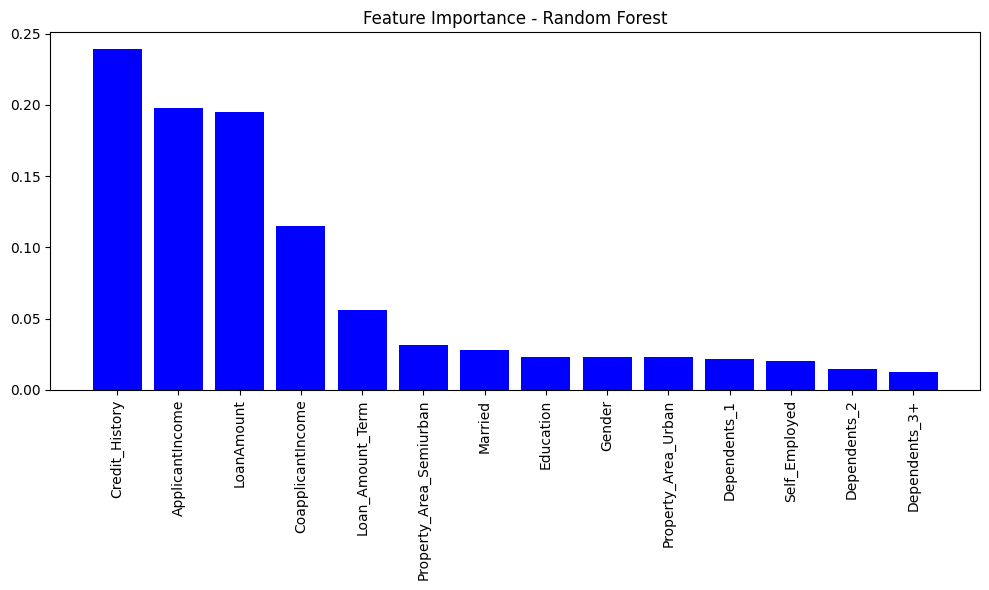

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Best Random Forest Model Performance:
                              Model  Accuracy  Precision    Recall  F1-score
0  Best Random Forest (Grid Search)  0.788618   0.825253  0.788618  0.761491


In [3]:
# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Display plots inline in the notebook
%matplotlib inline

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv('loan.csv')

# Data Preprocessing
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)
df.drop('Loan_ID', axis=1, inplace=True)

# Split data into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build models for comparison

## Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

## Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

## Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

## Support Vector Classifier (SVC)
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

## K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Create a function to store evaluation metrics in a dataframe
def get_model_metrics(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }

# Store metrics in a dataframe
models_results = []

models_results.append(get_model_metrics("Logistic Regression", y_test, log_reg_pred))
models_results.append(get_model_metrics("Random Forest", y_test, rf_pred))
models_results.append(get_model_metrics("Decision Tree", y_test, dt_pred))
models_results.append(get_model_metrics("Support Vector Classifier", y_test, svc_pred))
models_results.append(get_model_metrics("K-Nearest Neighbors", y_test, knn_pred))

# Convert to DataFrame
results_df = pd.DataFrame(models_results)

# Display model comparison DataFrame
print("Model Comparison Results:")
print(results_df)

# Append predictions to the original test set
test_results = pd.DataFrame(X_test, columns=X.columns)
test_results['Actual_Status'] = y_test.values
test_results['Predicted_Status_LogReg'] = log_reg_pred
test_results['Predicted_Status_RF'] = rf_pred
test_results['Predicted_Status_DT'] = dt_pred
test_results['Predicted_Status_SVC'] = svc_pred
test_results['Predicted_Status_KNN'] = knn_pred

# Display the test results with predictions
print("\nTest Results with Predictions:")
print(test_results.head())

# Feature Importance for Random Forest
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)

# Evaluate best Random Forest model
best_rf_metrics = get_model_metrics("Best Random Forest (Grid Search)", y_test, best_rf_pred)
print("\nBest Random Forest Model Performance:")
print(pd.DataFrame([best_rf_metrics]))